## Adagrad

Studiamo **accuracy** e **loss** per i dati di training e validation usando l'optimizer Adagrad: 

In [42]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

In [43]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 3


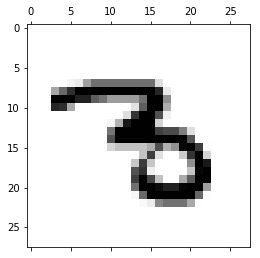

an example of a data point with label 3 before to_categorical ...
... and with label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [44]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[30])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[30,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[30], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[30], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [46]:
from keras.optimizers import Adagrad

def compile_model_adagrad():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


"Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the learning rate.

It is recommended to leave the parameters of this optimizer at their default values."

Per questo non abbiamo inizializzato i parametri di questo optimizer.

In [47]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model_adagrad()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.2971 - acc: 0.9132 - val_loss: 0.1344 - val_acc: 0.9581
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.1516 - acc: 0.9575 - val_loss: 0.1025 - val_acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.1178 - acc: 0.9664 - val_loss: 0.0899 - val_acc: 0.9729
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0992 - acc: 0.9722 - val_loss: 0.0828 - val_acc: 0.9756
Epoch 5/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.0850 - acc: 0.9760 - val_loss: 0.0739 - val_acc: 0.9773


10000/10000 [==============================] - 0s 27us/step

Test loss: 0.07388298230343499
Test accuracy: 0.9773


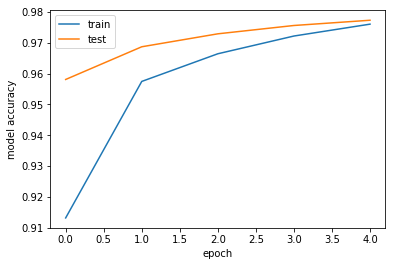

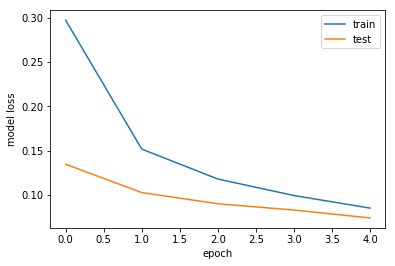

In [48]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Utilizzando lo Stocastic Gradient Descent avevamo ottenuto:

Test loss: 0.15392982622757553

Test accuracy: 0.9535

Notiamo che la loss function si è dimezzata, mentre la accuracy è paragonabile a quella ottenuta tramite SGD.

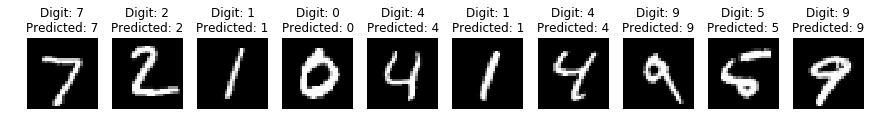

In [49]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## RMSprop
Studiamo accuracy e loss per i dati di training e validation usando l'optimizer RMSprop:

In [50]:
from keras.optimizers import RMSprop

def compile_model_RMS():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [51]:
# training parameters
batch_size = 32
epochs = 5

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# create the deep neural net
model_DNN = compile_model_RMS()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.2819 - acc: 0.9187 - val_loss: 0.1425 - val_acc: 0.9607
Epoch 2/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1540 - acc: 0.9610 - val_loss: 0.1190 - val_acc: 0.9711
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.1429 - acc: 0.9669 - val_loss: 0.1336 - val_acc: 0.9723
Epoch 4/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.1485 - acc: 0.9690 - val_loss: 0.1640 - val_acc: 0.9733
Epoch 5/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.1432 - acc: 0.9716 - val_loss: 0.1862 - val_acc: 0.9713


10000/10000 [==============================] - 0s 29us/step

Test loss: 0.18620510689077288
Test accuracy: 0.9713


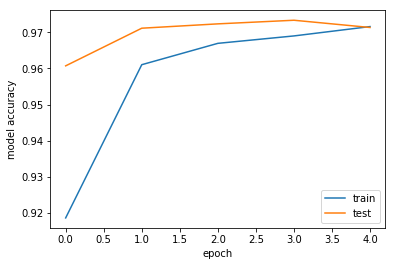

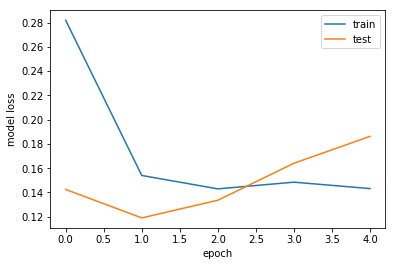

In [52]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Entrambi i valori sono confrontabili con quanto ottenuto nello SGD

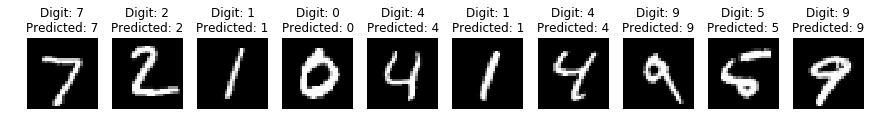

In [53]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Adadelta
Studiamo accuracy e loss per i dati di training e validation usando l'optimizer Adadelta, una estensione più robusta di Adagrad:

In [54]:
from keras.optimizers import Adadelta

def compile_model_adadelta():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [55]:
# training parameters
batch_size = 32
epochs = 5

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# create the deep neural net
model_DNN = compile_model_RMS()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.2846 - acc: 0.9170 - val_loss: 0.1164 - val_acc: 0.9658
Epoch 2/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.1478 - acc: 0.9635 - val_loss: 0.1367 - val_acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1392 - acc: 0.9686 - val_loss: 0.1328 - val_acc: 0.9739
Epoch 4/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.1371 - acc: 0.9716 - val_loss: 0.1574 - val_acc: 0.9741
Epoch 5/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.1423 - acc: 0.9722 - val_loss: 0.1724 - val_acc: 0.9746


In [1]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

NameError: name 'model_DNN' is not defined

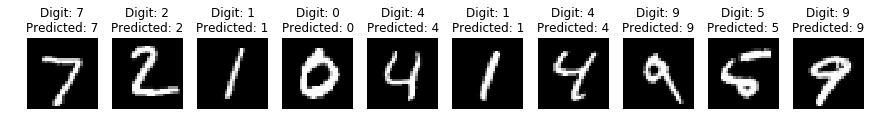

In [57]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()